In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('marketing_AB.csv')
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [20]:
df.shape

(588101, 7)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [22]:
df["user id"].nunique()

588101

In [23]:
df = df.drop(columns=['user id', 'Unnamed: 0'])

In [24]:
df['total ads'].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

In [25]:
df_cat = df[['test group','converted','most ads day','most ads hour']]
for i in df_cat.columns:
    print(i.upper(), " : ", df_cat[i].unique())

TEST GROUP  :  ['ad' 'psa']
CONVERTED  :  [False  True]
MOST ADS DAY  :  ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
MOST ADS HOUR  :  [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


C:\Users\Acer\AppData\Local\Temp\ipykernel_11716\1126429378.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=df_cat, palette=['#5D3FD3', '#73B748'])


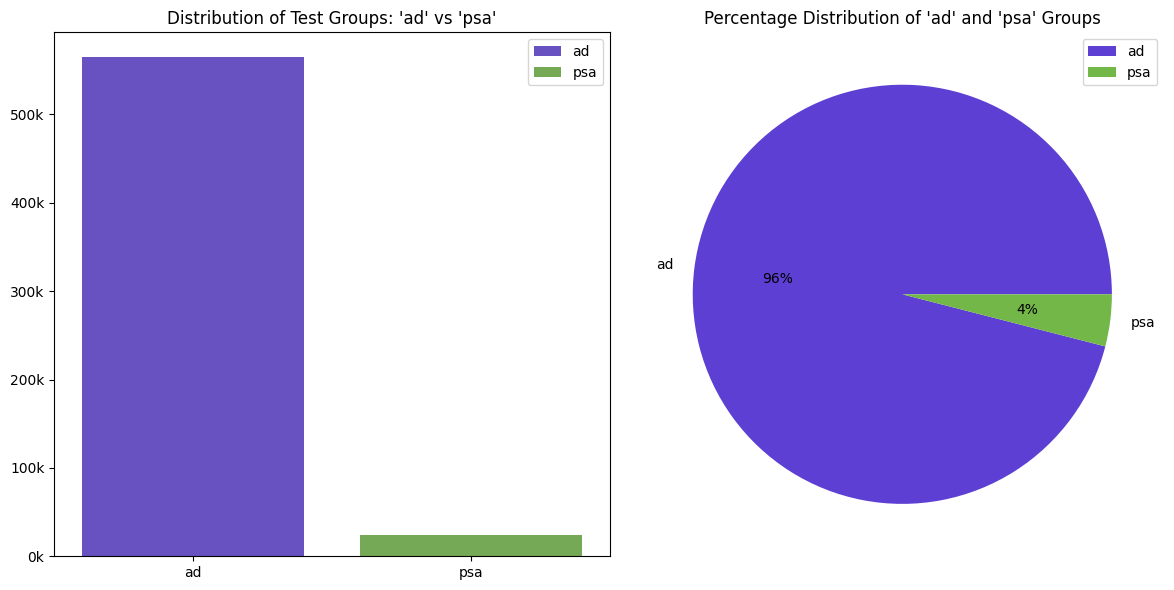

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

variable = 'test group'
# Formatter function to convert y-axis labels to 'k' format
def thousands_formatter(x, pos):
    return '%1.0fk' % (x * 1e-3)

# Create a figure
plt.figure(figsize=(12, 6))
counts = df_cat[variable].value_counts()

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat, palette=['#5D3FD3', '#73B748'])
plt.title("Distribution of Test Groups: 'ad' vs 'psa'")
plt.xlabel("")
plt.ylabel("")
plt.legend(counts.index, loc="best")
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(counts, labels=counts.index, autopct='%0.0f%%', colors=['#5D3FD3', '#73B748'])
plt.title("Percentage Distribution of 'ad' and 'psa' Groups")
plt.legend(counts.index, loc="best")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_11716\3781066011.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=variable, data=df_cat, palette=['#FF6F61','#78dbe2'])


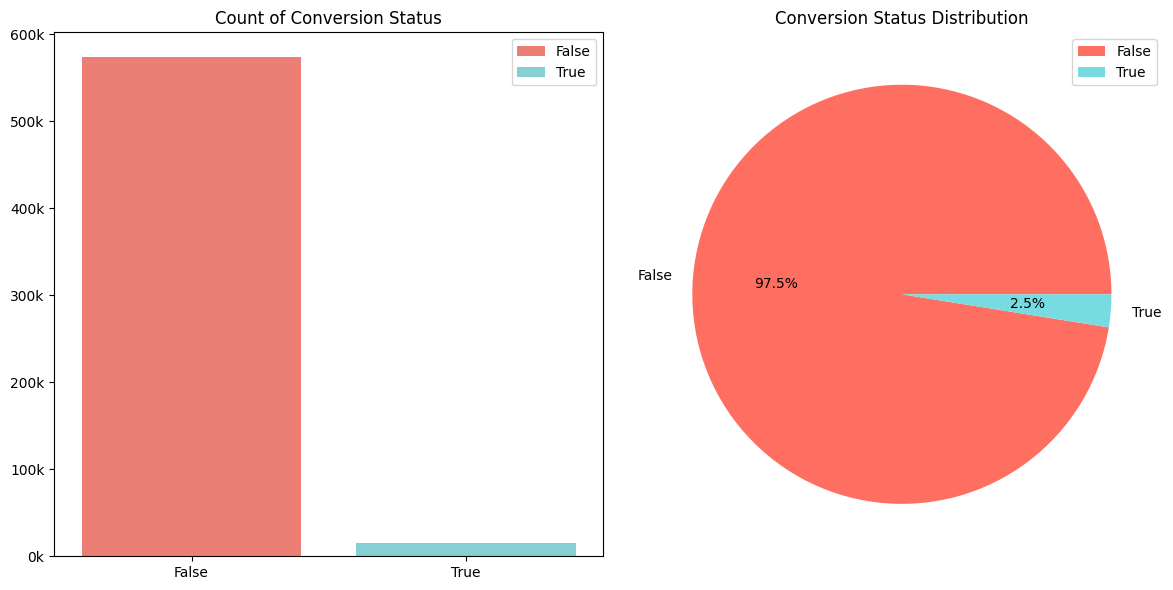

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

variable = 'converted'
# Create a figure
plt.figure(figsize=(12, 6))
counts = df_cat[variable].value_counts()

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat, palette=['#FF6F61','#78dbe2'])
plt.title("Count of Conversion Status")
plt.xlabel("")
plt.ylabel("")
plt.legend(counts.index, loc="best")
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(counts, labels=counts.index, autopct='%0.1f%%', colors=['#FF6F61','#78dbe2'])
plt.title("Conversion Status Distribution")
plt.legend(counts.index, loc="best")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_11716\1080315462.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat[variable] = pd.Categorical(df_cat[variable], categories=days_order, ordered=True)


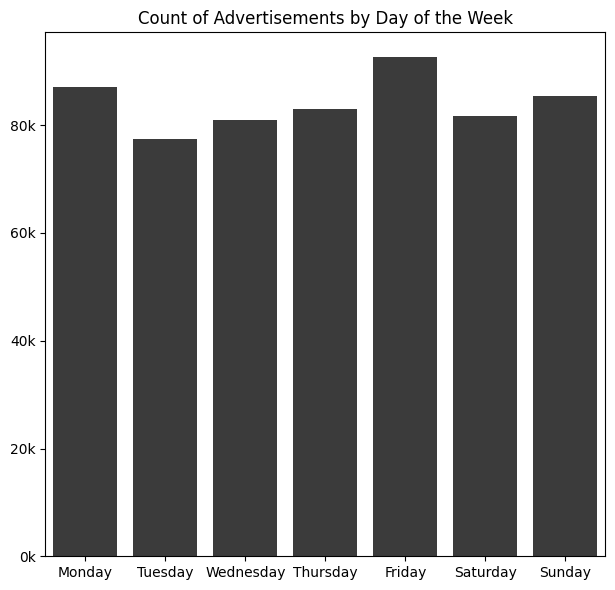

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

variable = 'most ads day'

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_cat[variable] = pd.Categorical(df_cat[variable], categories=days_order, ordered=True)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_cat, order=days_order, color  = '#3b3b3b')
plt.xlabel("")
plt.ylabel("")
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.title("Count of Advertisements by Day of the Week")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_11716\1825841816.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=variable, data=df_cat, order=hours_order, palette=colors)


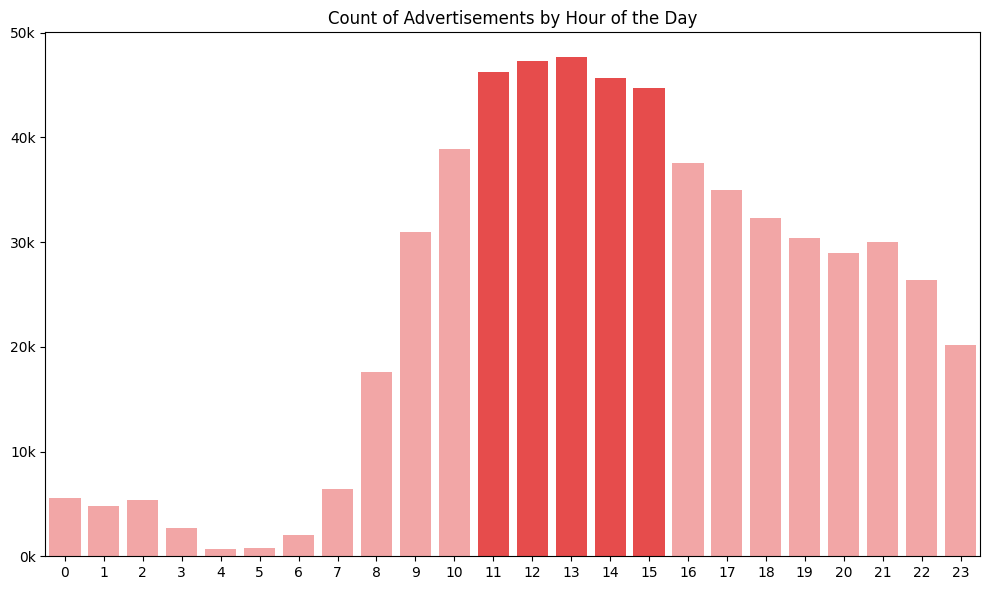

In [29]:
variable = 'most ads hour'

# Ensure the hours are ordered correctly
hours_order = list(range(24))

# Count the occurrences of each hour
counts = df_cat[variable].value_counts().reindex(hours_order, fill_value=0).sort_values(ascending=False)
top5_hours = counts.head(5).index

# Create a color palette with default and darker colors for top 5
colors = ['#FF9999' if hour not in top5_hours else '#FF3333' for hour in hours_order]

# Create a figure
plt.figure(figsize=(10, 6))

# Count plot with custom colors for the top 5 highest columns
ax = sns.countplot(x=variable, data=df_cat, order=hours_order, palette=colors)
plt.xlabel("")
plt.ylabel("")
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.title('Count of Advertisements by Hour of the Day')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

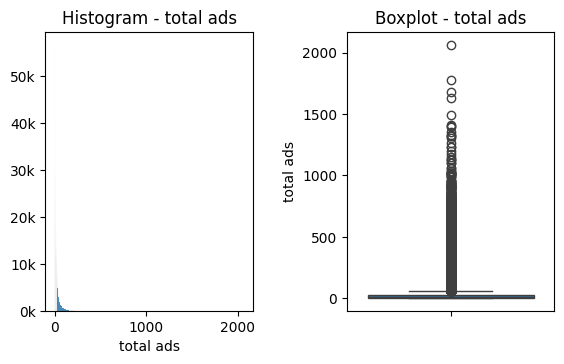

In [30]:
variable = 'total ads'

plt.figure(figsize=(6, 4))
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(x=variable, data=df)
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.ylabel("")
plt.title(f'Histogram - {variable}')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=variable, data=df)
plt.title(f'Boxplot - {variable}')

# Adjust layout
plt.tight_layout(pad = 2)

# Show the plots
plt.show()

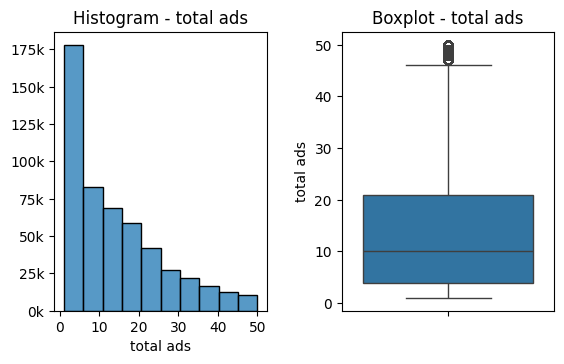

In [31]:
variable = 'total ads'

plt.figure(figsize=(6, 4))
# Histogram
plt.subplot(1, 2, 1)
# Filtering the data for a value close to 75th percentile only for better visualization
sns.histplot(x=variable, data=df[df['total ads'] <= 50],bins = 10)
plt.xticks(range(0, 51, 10))
plt.ylabel("")
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
plt.title(f'Histogram - {variable}')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=variable, data=df[df['total ads'] <= 50])
plt.title(f'Boxplot - {variable}')

# Adjust layout
plt.tight_layout(pad = 2)

# Show the plots
plt.show()

# T-Test

In [32]:
from scipy import stats

ad_conversions = df[df['test group'] == 'ad']['converted'].tolist()
psa_conversions = df[df['test group'] == 'psa']['converted'].tolist()

t_stat, p_value = stats.ttest_ind(ad_conversions, psa_conversions)

print(f'T-statistic: {t_stat}')
print(f'p-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis (H₀).\nThe mean conversions for 'ad' and 'psa' groups are different.")
else:
    print("We fail to reject the null hypothesis (H₀).\nThe mean conversions for 'ad' and 'psa' groups are not different.")


T-statistic: 7.37040597428566
p-value: 1.7033052627831264e-13
We reject the null hypothesis (H₀).
The mean conversions for 'ad' and 'psa' groups are different.


# Crosstab for test group and conversion


* Define a function to apply color based on the column name

In [37]:
def highlight_columns(s):
    color = 'background-color: '
    if s.name == False:
        return [color + 'darkred'] * len(s)
    elif s.name == True:
        return [color + 'darkgreen'] * len(s)
    else:
        return [''] * len(s)

In [38]:
ct_conversion_test_group = pd.crosstab(df['test group'], df['converted'], normalize='index')
style = ct_conversion_test_group.style.apply(highlight_columns, axis=0)
style

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


# Z-Test

In [39]:
import numpy as np
import statsmodels.api as sm

# Conversion data
conversions_ad = np.sum(df[df['test group'] == 'ad']['converted'])
total_ad = len(df[df['test group'] == 'ad'])
conversions_psa = np.sum(df[df['test group'] == 'psa']['converted'])
total_psa = len(df[df['test group'] == 'psa'])

# Conducting z-test for proportions
count = np.array([conversions_ad, conversions_psa])
nobs = np.array([total_ad, total_psa])

# Performing the test
z_stat, p_value = sm.stats.proportions_ztest(count, nobs)

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation of the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("The difference in conversion rates is statistically significant.")
else:
    print("The difference in conversion rates is not statistically significant.")

Z-statistic: 7.3701
P-value: 0.0000
The difference in conversion rates is statistically significant.


# Z-Test manualy

In [40]:
from scipy.stats import norm


group_ad = df[df['test group'] == 'ad']['converted']
group_psa = df[df['test group'] == 'psa']['converted']

n_ad = len(group_ad)
n_psa = len(group_psa)
success_ad = np.sum(group_ad)
success_psa = np.sum(group_psa)

# Proportions
p_ad = success_ad / n_ad
p_psa = success_psa / n_psa

# Combined proportion
p_combined = (success_ad + success_psa) / (n_ad + n_psa)

# Z-test for proportions formula
z_stat = (p_ad - p_psa) / np.sqrt(p_combined * (1 - p_combined) * (1/n_ad + 1/n_psa))

# Calculate p-value
p_value = 2 * (1 - norm.cdf(abs(z_stat)))

# Print results
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")
alpha = 0.05  # significance level
if p_value < alpha:
    print("The difference in conversion rates is statistically significant.")
else:
    print("The difference in conversion rates is not statistically significant.")

Z-statistic: 7.3701
P-value: 0.0000
The difference in conversion rates is statistically significant.


# Calculating effect size (Cohen's d)


In [41]:
import numpy as np
import matplotlib.pyplot as plt

def cohen_d(x, y):
    return (np.mean(x) - np.mean(y)) / np.sqrt(((np.std(x) ** 2) + (np.std(y) ** 2)) / 2)

ad_conversions = df[df['test group'] == 'ad']['converted'].tolist()
psa_conversions = df[df['test group'] == 'psa']['converted'].tolist()
effect_size = cohen_d(ad_conversions, psa_conversions)
print(f"Effect size = {effect_size:.1}")
if abs(effect_size) < 0.2:
    print("Small effect: the difference between 'ad' and 'psa' conversions is negligible")
elif abs(effect_size) < 0.5:
    print("Medium effect: the difference between 'ad' and 'psa' conversions is moderate")
elif abs(effect_size) < 0.8:
    print("Large effect: the difference between 'ad' and 'psa' conversions is significant")
else:
    print("Very large effect: the difference between 'ad' and 'psa' conversions is very significant")


Effect size = 0.05
Small effect: the difference between 'ad' and 'psa' conversions is negligible


In [42]:
df_ad = df[df['test group'] == 'ad']
df_psa = df[df['test group'] == 'psa']

In [43]:
# ct_conversion_day = pd.crosstab(df['most ads day'], df['converted'], normalize = 'index')
# ct_conversion_day.sort_values(by=True, ascending=False)

# Create and style crosstab for 'ad'

In [44]:
ct_conversion_day_ad = pd.crosstab(df_ad['most ads day'], df_ad['converted'], normalize='index')
ct_conversion_day_ad_sorted = ct_conversion_day_ad.sort_values(by=True, ascending=False)
print("For group AD:")
styled_ct_ad = ct_conversion_day_ad_sorted.style.apply(highlight_columns, axis=0)
styled_ct_ad

For group AD:


converted,False,True
most ads day,,
Monday,0.966759,0.033241
Tuesday,0.969560,0.030440
Wednesday,0.974644,0.025356
Sunday,0.975380,0.024620
Friday,0.977535,0.022465
Thursday,0.978363,0.021637
Saturday,0.978693,0.021307


# Create and style crosstab for 'psa'


In [45]:
ct_conversion_day_psa = pd.crosstab(df_psa['most ads day'], df_psa['converted'], normalize='index')
ct_conversion_day_psa_sorted = ct_conversion_day_psa.sort_values(by=True, ascending=False)
print("For group PSA:")
styled_ct_psa = ct_conversion_day_psa_sorted.style.apply(highlight_columns, axis=0)
styled_ct_psa

For group PSA:


converted,False,True
most ads day,,
Monday,0.977441,0.022559
Sunday,0.979405,0.020595
Thursday,0.979770,0.020230
Friday,0.983697,0.016303
Wednesday,0.984241,0.015759
Tuesday,0.985552,0.014448
Saturday,0.986004,0.013996


# Chi Squared Test for independence 'most ads day' and 'converted'

In [46]:
# Create the crosstab dataframe
ct_conversion_day_ad = pd.crosstab(df_ad['most ads day'], df_ad['converted'])

# Perform chi-square test
chi2_stat, p_value, _, _ = stats.chi2_contingency(ct_conversion_day_ad)

print("This Test is for group AD\n")
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("We reject the null hypothesis (H₀).\nThe variables 'most ads day' and 'converted' are dependent.")
else:
    print("We fail to reject the null hypothesis (H₀).\nThe variables 'most ads day' and 'converted' are independent.")

This Test is for group AD

Chi-square statistic: 412.7943
P-value: 0.0000
We reject the null hypothesis (H₀).
The variables 'most ads day' and 'converted' are dependent.


In [47]:
# Create the crosstab dataframe
ct_conversion_day_psa = pd.crosstab(df_psa['most ads day'], df_psa['converted'])

# Perform chi-square test
chi2_stat, p_value, _, _ = stats.chi2_contingency(ct_conversion_day_psa)

print("This Test is for group PSA\n")
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("We reject the null hypothesis (H₀).\nThe variables 'most ads day' and 'converted' are dependent.")
else:
    print("We fail to reject the null hypothesis (H₀).\nThe variables 'most ads day' and 'converted' are independent.")

This Test is for group PSA

Chi-square statistic: 12.7329
P-value: 0.0475
We reject the null hypothesis (H₀).
The variables 'most ads day' and 'converted' are dependent.


# Conversion rate hamematats monday conversion rate AD i hamar

In [48]:
import pandas as pd
import numpy as np

ct_conversion_day_ad = pd.crosstab(df_ad['most ads day'], df_ad['converted'], normalize='index')

# Calculate overall conversion rate for 'True' across all days
overall_conversion_rate = df_ad['converted'].mean()

# Calculate conversion rate for 'True' for Monday, handling missing days
monday_conversion_rate = ct_conversion_day_ad.loc['Monday', True] if 'Monday' in ct_conversion_day_ad.index else np.nan

# Calculate conversion rates for 'True' for weekends (Saturday and Sunday) and weekdays (Monday to Friday)
weekend_days = ['Saturday', 'Sunday']
weekday_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

weekend_conversion_rate = (
    ct_conversion_day_ad.loc[weekend_days, True].mean()
    if any(day in ct_conversion_day_ad.index for day in weekend_days) else np.nan
)

weekday_conversion_rate = (
    ct_conversion_day_ad.loc[weekday_days, True].mean()
    if any(day in ct_conversion_day_ad.index for day in weekday_days) else np.nan
)

# Calculate relative percentages
relative_percentage_overall = (
    ((overall_conversion_rate - monday_conversion_rate) / monday_conversion_rate) * 100
    if pd.notna(monday_conversion_rate) and monday_conversion_rate != 0 else np.nan
)

relative_percentage_weekend = (
    ((weekend_conversion_rate - monday_conversion_rate) / monday_conversion_rate) * 100
    if pd.notna(monday_conversion_rate) and monday_conversion_rate != 0 else np.nan
)

relative_percentage_weekday = (
    ((weekday_conversion_rate - monday_conversion_rate) / monday_conversion_rate) * 100
    if pd.notna(monday_conversion_rate) and monday_conversion_rate != 0 else np.nan
)

# Print the results
# print("Overall Conversion Rate (True) across all days:")
# print(f"{overall_conversion_rate:.6f}")

print("\nTest Group = AD\n\nConversion Rate (True) for Monday:")
print(f"{monday_conversion_rate:.6f}")

# print("\nConversion Rate (True) for Weekends:")
# print(f"{weekend_conversion_rate:.6f}")

# print("\nConversion Rate (True) for Weekdays:")
# print(f"{weekday_conversion_rate:.6f}")

print("Relative Percentage of Overall Conversion Rate compared to Monday:")
print(f"{relative_percentage_overall:.2f}%" if pd.notna(relative_percentage_overall) else "NaN")

print("Relative Percentage of Weekend Conversion Rate compared to Monday:")
print(f"{relative_percentage_weekend:.2f}%" if pd.notna(relative_percentage_weekend) else "NaN")

print("Relative Percentage of Weekday Conversion Rate compared to Monday:")
print(f"{relative_percentage_weekday:.2f}%" if pd.notna(relative_percentage_weekday) else "NaN")



Test Group = AD

Conversion Rate (True) for Monday:
0.033241
Relative Percentage of Overall Conversion Rate compared to Monday:
-23.15%
Relative Percentage of Weekend Conversion Rate compared to Monday:
-30.92%
Relative Percentage of Weekday Conversion Rate compared to Monday:
-19.89%


# P-Values Matrix for group AD

In [49]:
import pandas as pd
from scipy import stats
import numpy as np

# Create the crosstab dataframe
ct_conversion_day_ad = pd.crosstab(df_ad['most ads day'], df_ad['converted'])

# Define the order of days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex the crosstab to ensure correct order
ct_conversion_day_ad = ct_conversion_day_ad.reindex(day_order)

# Initialize an empty DataFrame to store p-values
p_value_matrix = pd.DataFrame(index=day_order, columns=day_order)

# Loop through each pair of days
for day1 in day_order:
    for day2 in day_order:
        # Create a subtable for the two days
        subtable = ct_conversion_day_ad.loc[[day1, day2]]
        
        # Perform chi-square test
        chi2_stat, p_value, dof, expected = stats.chi2_contingency(subtable)
        
        # Store the p-value in the matrix, formatted to two decimal places
        p_value_matrix.loc[day1, day2] = f"{p_value:.3f}"

# Display the p-value matrix
print("AD group\nP-value matrix:")
p_value_matrix

AD group
P-value matrix:


,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Monday,1.000,0.002,0.000,0.000,0.000,0.000,0.000
Tuesday,0.002,1.000,0.000,0.000,0.000,0.000,0.000
Wednesday,0.000,0.000,1.000,0.000,0.000,0.000,0.354
Thursday,0.000,0.000,0.000,1.000,0.256,0.663,0.000
Friday,0.000,0.000,0.000,0.256,1.000,0.110,0.003
Saturday,0.000,0.000,0.000,0.663,0.110,1.000,0.000
Sunday,0.000,0.000,0.354,0.000,0.003,0.000,1.000


In [50]:
import pandas as pd
import numpy as np

# Calculate overall conversion rate for 'True' across all days
overall_conversion_rate = df_ad['converted'].mean()

# Calculate combined conversion rate for 'True' for Monday and Tuesday, handling missing days
monday_tuesday_days = ['Monday', 'Tuesday']
combined_monday_tuesday_rate = (
    ct_conversion_day_ad.loc[monday_tuesday_days, True].mean()
    if any(day in ct_conversion_day_ad.index for day in monday_tuesday_days) else np.nan
)

# Calculate conversion rates for 'True' for weekends (Saturday and Sunday) and weekdays (Monday to Friday)
weekend_days = ['Saturday', 'Sunday']
weekday_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

weekend_conversion_rate = (
    ct_conversion_day_ad.loc[weekend_days, True].mean()
    if any(day in ct_conversion_day_ad.index for day in weekend_days) else np.nan
)

weekday_conversion_rate = (
    ct_conversion_day_ad.loc[weekday_days, True].mean()
    if any(day in ct_conversion_day_ad.index for day in weekday_days) else np.nan
)

# Calculate relative percentages
relative_percentage_overall = (
    ((overall_conversion_rate - combined_monday_tuesday_rate) / combined_monday_tuesday_rate) * 100
    if pd.notna(combined_monday_tuesday_rate) and combined_monday_tuesday_rate != 0 else np.nan
)

relative_percentage_weekend = (
    ((weekend_conversion_rate - combined_monday_tuesday_rate) / combined_monday_tuesday_rate) * 100
    if pd.notna(combined_monday_tuesday_rate) and combined_monday_tuesday_rate != 0 else np.nan
)

relative_percentage_weekday = (
    ((weekday_conversion_rate - combined_monday_tuesday_rate) / combined_monday_tuesday_rate) * 100
    if pd.notna(combined_monday_tuesday_rate) and combined_monday_tuesday_rate != 0 else np.nan
)

# Print the results
# print("Overall Conversion Rate (True) across all days:")
# print(f"{overall_conversion_rate:.6f}")

print("\nTest Group = AD\n\nCombined Conversion Rate (True) for Monday and Tuesday:")
print(f"{combined_monday_tuesday_rate:.6f}")

# print("\nConversion Rate (True) for Weekends:")
# print(f"{weekend_conversion_rate:.6f}")

# print("\nConversion Rate (True) for Weekdays:")
# print(f"{weekday_conversion_rate:.6f}")

print("\nRelative Percentage of Overall Conversion Rate compared to Monday and Tuesday:")
print(f"{relative_percentage_overall:.2f}%" if pd.notna(relative_percentage_overall) else "NaN")

print("\nRelative Percentage of Weekend Conversion Rate compared to Monday and Tuesday:")
print(f"{relative_percentage_weekend:.2f}%" if pd.notna(relative_percentage_weekend) else "NaN")

print("\nRelative Percentage of Weekday Conversion Rate compared to Monday and Tuesday:")
print(f"{relative_percentage_weekday:.2f}%" if pd.notna(relative_percentage_weekday) else "NaN")



Test Group = AD

Combined Conversion Rate (True) for Monday and Tuesday:
2524.000000

Relative Percentage of Overall Conversion Rate compared to Monday and Tuesday:
-100.00%

Relative Percentage of Weekend Conversion Rate compared to Monday and Tuesday:
-26.58%

Relative Percentage of Weekday Conversion Rate compared to Monday and Tuesday:
-15.08%


# Conversion rate hamematats monday conversion rate PSA i hamar

In [51]:
import pandas as pd
import numpy as np

ct_conversion_day_psa = pd.crosstab(df_psa['most ads day'], df_psa['converted'], normalize='index')
# Calculate overall conversion rate for 'True' across all days
overall_conversion_rate = df_psa['converted'].mean()

# Calculate conversion rate for 'True' for Monday, handling missing days
monday_conversion_rate = ct_conversion_day_psa.loc['Monday', True] if 'Monday' in ct_conversion_day_psa.index else np.nan

# Calculate conversion rates for 'True' for weekends (Saturday and Sunday) and weekdays (Monday to Friday)
weekend_days = ['Saturday', 'Sunday']
weekday_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

weekend_conversion_rate = (
    ct_conversion_day_psa.loc[weekend_days, True].mean()
    if any(day in ct_conversion_day_psa.index for day in weekend_days) else np.nan
)

weekday_conversion_rate = (
    ct_conversion_day_psa.loc[weekday_days, True].mean()
    if any(day in ct_conversion_day_psa.index for day in weekday_days) else np.nan
)

# Calculate relative percentages
relative_percentage_overall = (
    ((overall_conversion_rate - monday_conversion_rate) / monday_conversion_rate) * 100
    if pd.notna(monday_conversion_rate) and monday_conversion_rate != 0 else np.nan
)

relative_percentage_weekend = (
    ((weekend_conversion_rate - monday_conversion_rate) / monday_conversion_rate) * 100
    if pd.notna(monday_conversion_rate) and monday_conversion_rate != 0 else np.nan
)

relative_percentage_weekday = (
    ((weekday_conversion_rate - monday_conversion_rate) / monday_conversion_rate) * 100
    if pd.notna(monday_conversion_rate) and monday_conversion_rate != 0 else np.nan
)

# Print the results
# print("Overall Conversion Rate (True) across all days:")
# print(f"{overall_conversion_rate:.6f}")

print("\nTest Group = PSA\n\nConversion Rate (True) for Monday:")
print(f"{monday_conversion_rate:.6f}")

# print("\nConversion Rate (True) for Weekends:")
# print(f"{weekend_conversion_rate:.6f}")

# print("\nConversion Rate (True) for Weekdays:")
# print(f"{weekday_conversion_rate:.6f}")

print("\nRelative Percentage of Overall Conversion Rate compared to Monday:")
print(f"{relative_percentage_overall:.2f}%" if pd.notna(relative_percentage_overall) else "NaN")

print("\nRelative Percentage of Weekend Conversion Rate compared to Monday:")
print(f"{relative_percentage_weekend:.2f}%" if pd.notna(relative_percentage_weekend) else "NaN")

print("\nRelative Percentage of Weekday Conversion Rate compared to Monday:")
print(f"{relative_percentage_weekday:.2f}%" if pd.notna(relative_percentage_weekday) else "NaN")



Test Group = PSA

Conversion Rate (True) for Monday:
0.022559

Relative Percentage of Overall Conversion Rate compared to Monday:
-20.85%

Relative Percentage of Weekend Conversion Rate compared to Monday:
-23.33%

Relative Percentage of Weekday Conversion Rate compared to Monday:
-20.83%


In [52]:
import pandas as pd
from scipy import stats
import numpy as np

# Create the crosstab dataframe
ct_conversion_day_psa = pd.crosstab(df_psa['most ads day'], df_psa['converted'])

# Define the order of days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex the crosstab to ensure correct order
ct_conversion_day_psa = ct_conversion_day_psa.reindex(day_order)

# Initialize an empty DataFrame to store p-values
p_value_matrix = pd.DataFrame(index=day_order, columns=day_order)

# Loop through each pair of days
for day1 in day_order:
    for day2 in day_order:
        # Create a subtable for the two days
        subtable = ct_conversion_day_psa.loc[[day1, day2]]
        
        # Perform chi-square test
        chi2_stat, p_value, dof, expected = stats.chi2_contingency(subtable)
        
        # Store the p-value in the matrix, formatted to two decimal places
        p_value_matrix.loc[day1, day2] = f"{p_value:.3f}"

# Display the p-value matrix
print("PSA group\nP-value matrix:")
p_value_matrix

PSA group
P-value matrix:


,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Monday,1.000,0.022,0.047,0.541,0.063,0.016,0.645
Tuesday,0.022,1.000,0.745,0.090,0.610,0.973,0.088
Wednesday,0.047,0.745,1.000,0.176,0.927,0.637,0.169
Thursday,0.541,0.090,0.176,1.000,0.230,0.067,0.983
Friday,0.063,0.610,0.927,0.230,1.000,0.510,0.218
Saturday,0.016,0.973,0.637,0.067,0.510,1.000,0.066
Sunday,0.645,0.088,0.169,0.983,0.218,0.066,1.000


In [53]:
# import pandas as pd
# import numpy as np

# # Calculate overall conversion rate for 'True' across all days
# overall_conversion_rate = df_psa['converted'].mean()

# # Calculate combined conversion rate for 'True' for Monday and Tuesday, handling missing days
# monday_tuesday_days = ['Monday', 'Thursday']
# combined_monday_tuesday_rate = (
#     ct_conversion_day_psa.loc[monday_tuesday_days, True].mean()
#     if any(day in ct_conversion_day_psa.index for day in monday_tuesday_days) else np.nan
# )

# # Calculate conversion rates for 'True' for weekends (Saturday and Sunday) and weekdays (Monday to Friday)
# weekend_days = ['Saturday', 'Sunday']
# weekday_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# weekend_conversion_rate = (
#     ct_conversion_day_psa.loc[weekend_days, True].mean()
#     if any(day in ct_conversion_day_psa.index for day in weekend_days) else np.nan
# )

# weekday_conversion_rate = (
#     ct_conversion_day_psa.loc[weekday_days, True].mean()
#     if any(day in ct_conversion_day_psa.index for day in weekday_days) else np.nan
# )

# # Calculate relative percentages
# relative_percentage_overall = (
#     ((overall_conversion_rate - combined_monday_tuesday_rate) / combined_monday_tuesday_rate) * 100
#     if pd.notna(combined_monday_tuesday_rate) and combined_monday_tuesday_rate != 0 else np.nan
# )

# relative_percentage_weekend = (
#     ((weekend_conversion_rate - combined_monday_tuesday_rate) / combined_monday_tuesday_rate) * 100
#     if pd.notna(combined_monday_tuesday_rate) and combined_monday_tuesday_rate != 0 else np.nan
# )

# relative_percentage_weekday = (
#     ((weekday_conversion_rate - combined_monday_tuesday_rate) / combined_monday_tuesday_rate) * 100
#     if pd.notna(combined_monday_tuesday_rate) and combined_monday_tuesday_rate != 0 else np.nan
# )

# # Print the results
# # print("Overall Conversion Rate (True) across all days:")
# # print(f"{overall_conversion_rate:.6f}")

# print("\nTest Group = PSA\n\nCombined Conversion Rate (True) for Monday, and Thursday:")
# print(f"{combined_monday_tuesday_rate:.6f}")

# # print("\nConversion Rate (True) for Weekends:")
# # print(f"{weekend_conversion_rate:.6f}")

# # print("\nConversion Rate (True) for Weekdays:")
# # print(f"{weekday_conversion_rate:.6f}")

# print("\nRelative Percentage of Overall Conversion Rate compared to  Monday, and Thursday:")
# print(f"{relative_percentage_overall:.2f}%" if pd.notna(relative_percentage_overall) else "NaN")

# print("\nRelative Percentage of Weekend Conversion Rate compared toMonday, and Thursday:")
# print(f"{relative_percentage_weekend:.2f}%" if pd.notna(relative_percentage_weekend) else "NaN")

# print("\nRelative Percentage of Weekday Conversion Rate compared to Monday, and Thursday:")
# print(f"{relative_percentage_weekday:.2f}%" if pd.notna(relative_percentage_weekday) else "NaN")


# Chi Squared Test for independence 'most ads hour' and 'converted'

In [54]:
ct_conversion_hour_ad = pd.crosstab(df_ad['most ads hour'], df_ad['converted'], normalize='index')
ct_conversion_hour_ad_sorted = ct_conversion_hour_ad.sort_values(by=True, ascending=False)
styled_ct_hour_ad = ct_conversion_hour_ad_sorted.style.apply(highlight_columns, axis=0)
styled_ct_hour_ad

converted,False,True
most ads hour,,
16,0.969107,0.030893
20,0.969726,0.030274
15,0.970155,0.029845
21,0.970825,0.029175
14,0.971425,0.028575
17,0.971463,0.028537
18,0.972530,0.027470
19,0.973191,0.026809
22,0.973545,0.026455


In [55]:
# ct_conversion_hour_psa = pd.crosstab(df_psa['most ads hour'], df_psa['converted'], normalize='index')
# ct_conversion_hour_psa_sorted = ct_conversion_hour_psa.sort_values(by=True, ascending=False)
# styled_ct_hour_psa = ct_conversion_hour_psa_sorted.style.apply(highlight_columns, axis=0)
# styled_ct_hour_psa

In [56]:
import pandas as pd
from scipy import stats

# Create the crosstab dataframe
ct_conversion_hour_ad = pd.crosstab(df_ad['most ads hour'], df_ad['converted'])

# Perform chi-square test
chi2_stat, p_value, _, _ = stats.chi2_contingency(ct_conversion_hour_ad)

print("This Test for group AD\n")
print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05  # significance level
if p_value < alpha:
    print("We reject the null hypothesis (H₀).\nThe variables 'most ads hour' and 'converted' are dependent.")
else:
    print("We fail to reject the null hypothesis (H₀).\nThe variables 'most ads hour' and 'converted' are independent.")

This Test for group AD

Chi-square statistic: 403.3270
P-value: 0.0000
We reject the null hypothesis (H₀).
The variables 'most ads hour' and 'converted' are dependent.


C:\Users\Acer\AppData\Local\Temp\ipykernel_11716\4041065522.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=true_conversions_percentage.index, y=true_conversions_percentage.values, palette=colors)


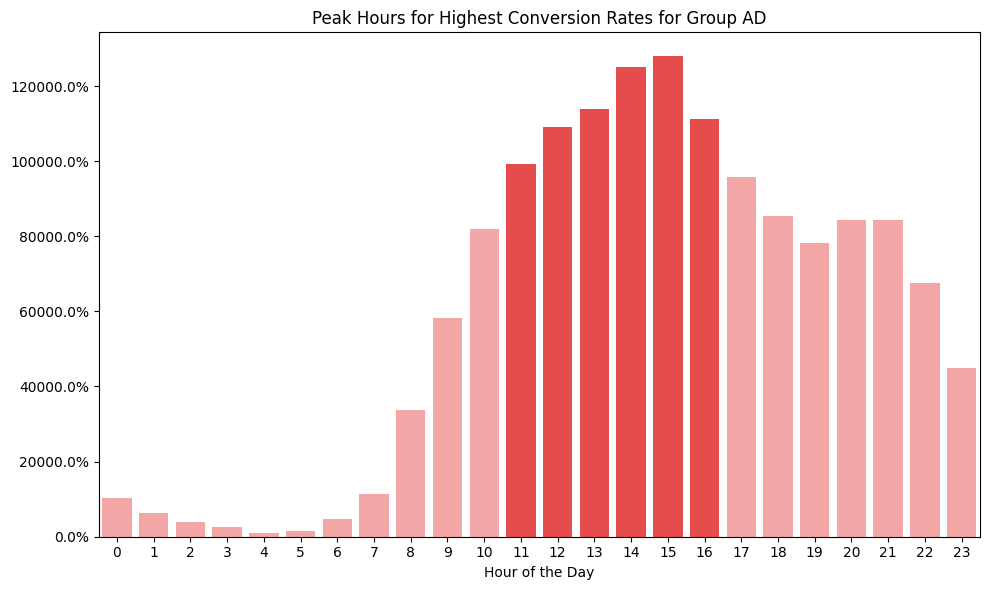

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract counts of True conversions for each hour from the crosstab
true_conversions = ct_conversion_hour_ad[True]

# Convert the counts to percentages
true_conversions_percentage = true_conversions * 100

# Ensure the hours are ordered correctly
hours_order = list(range(24))
true_conversions_percentage = true_conversions_percentage.reindex(hours_order, fill_value=0)

# Sort the counts to identify the top 5 hours
sorted_true_conversions_percentage = true_conversions_percentage.sort_values(ascending=False)
top5_hours = sorted_true_conversions_percentage.head(6).index

# Create a color palette with default and darker colors for top 5
colors = ['#FF9999' if hour not in top5_hours else '#FF3333' for hour in hours_order]

# Create a figure
plt.figure(figsize=(10, 6))

# Bar plot with custom colors for the top 5 highest columns
ax = sns.barplot(x=true_conversions_percentage.index, y=true_conversions_percentage.values, palette=colors)
plt.xlabel("Hour of the Day")
plt.ylabel("")
plt.title('Peak Hours for Highest Conversion Rates for Group AD')

# Format the y-axis to show percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}%'))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [58]:
# import pandas as pd
# from scipy import stats

# # Create the crosstab dataframe
# ct_conversion_hour_psa = pd.crosstab(df_psa['most ads hour'], df_psa['converted'])

# # Perform chi-square test
# chi2_stat, p_value, _, _ = stats.chi2_contingency(ct_conversion_hour_psa)

# print("This Test for group PSA\n")
# print(f"Chi-square statistic: {chi2_stat:.4f}")
# print(f"P-value: {p_value:.4f}")

# # Interpret the result
# alpha = 0.05  # significance level
# if p_value < alpha:
#     print("We reject the null hypothesis (H₀).\nThe variables 'most ads hour' and 'converted' are dependent.")
# else:
#     print("We fail to reject the null hypothesis (H₀).\nThe variables 'most ads hour' and 'converted' are independent.")


In [59]:
import pandas as pd
from scipy.stats import shapiro

ads_converted = df_ad[df_ad['converted'] == True]['total ads']
ads_not_converted = df_ad[df_ad['converted'] == False]['total ads']

_,p_value_true = shapiro(df_ad[df_ad['converted'] == True]['total ads'])
_,p_value_false = shapiro(df_ad[df_ad['converted'] == False]['total ads'])

alpha = 0.05
if p_value_true < alpha:    
    print(f"ads_converted group is not normally distributed")
else:    
    print(f"ads_converted group is normally distributed")
if p_value_false < alpha:
    print(f"ads_not_converted group is not normally distributed")
else:
    print(f"ads_converted group is normally distributed")

ads_converted group is not normally distributed
ads_not_converted group is not normally distributed


C:\Users\Acer\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


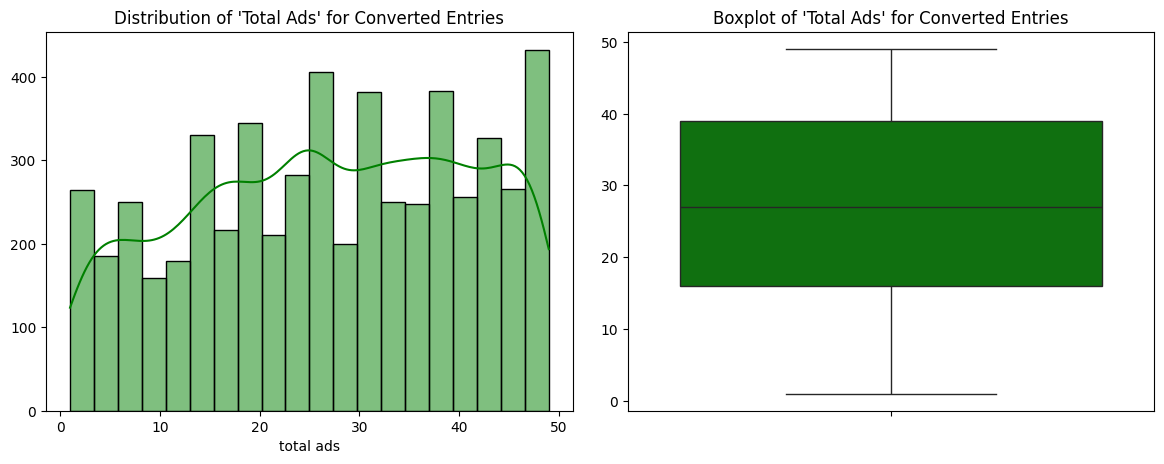

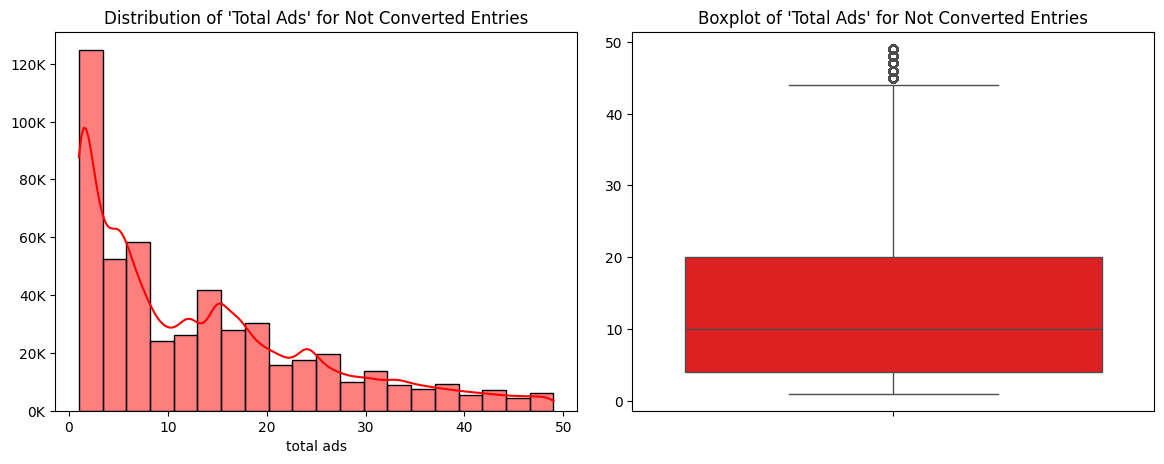

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Example dataset (replace this with your actual dataset)
ads_converted = df[df['converted']]['total ads']

def thousands_formatter(x, pos):
    return f'{int(x / 1000)}K'

plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(ads_converted[ads_converted < 50], bins=20, kde=True, color='green')
plt.title("Distribution of 'Total Ads' for Converted Entries")
plt.ylabel("")
# plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=ads_converted[ads_converted < 50], color='green')
plt.title("Boxplot of 'Total Ads' for Converted Entries")
plt.ylabel("")

# Adjust layout
plt.tight_layout(pad=2)

# Show the plots
plt.show()

# Example dataset (replace this with your actual dataset)
ads_not_converted = df[~df['converted']]['total ads']

def thousands_formatter(x, pos):
    return f'{int(x / 1000)}K'

plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(ads_not_converted[ads_not_converted < 50], bins=20, kde=True, color='red')
plt.title("Distribution of 'Total Ads' for Not Converted Entries")
plt.ylabel("")
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=ads_not_converted[ads_not_converted < 50], color='red')
plt.title("Boxplot of 'Total Ads' for Not Converted Entries")
plt.ylabel("")

# Adjust layout
plt.tight_layout(pad=2)

# Show the plots
plt.show()



In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Perform the Mann-Whitney U test because the groups are not normally distributed
# Conducting the Mann-Whitney U test
u_stat, p_value = mannwhitneyu(ads_converted, ads_not_converted, alternative='two-sided')

print(f"U-statistic: {u_stat}")
print(f"P-value: {p_value}")

# Interpretation of the result
alpha = 0.05  # Significance level
if p_value < alpha:
    print("We reject the null hypothesis (H₀).\nThe number of ad views ('total ads') affects conversion ('converted').")
else:
    print("We cannot reject the null hypothesis (H₀).\nThe number of ad views ('total ads') does not affect conversion ('converted').")

median_converted = ads_converted.median()
median_not_converted = ads_not_converted.median()
q1_converted, q3_converted = ads_converted.quantile([0.25, 0.75])
q1_not_converted, q3_not_converted = ads_not_converted.quantile([0.25, 0.75])

# Recommendation based on median values and quartiles
# print(f"Median of converted = {median_converted}")
if median_converted > median_not_converted:
    print(f"\nIt is recommended to increase the number of ad views to the range {median_converted} - {q3_converted}.")
else:
    print(f"\nIt is recommended to decrease the number of ad views to the range {q1_converted} - {median_converted}.")


# null and alternative hypotheses, p-values, significance levels (alpha),T Test, Chi Squared test, Shapiro-Wilk test,Levene's test,Mann-Whitney U test  and Type I/Type II errors,one-sided, two - sided.
